<a href="https://colab.research.google.com/github/pulkitm404/react-test/blob/master/DM_CrimeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
id = '1YWfdiTYtVLFxCqWstxjTe83TTKmlYacv'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('crimedata.csv')  

In [ ]:
import pandas as pd
df = pd.read_csv('crimedata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412.0,4.0,8.0,45.0,11,NaN,NaN,2001.0,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222.0,22.0,21.0,73.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835.0,8.0,18.0,70.0,05,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313.0,3.0,20.0,42.0,06,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122.0,1.0,42.0,32.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924280 entries, 0 to 924279
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    924280 non-null  int64  
 1   Case Number           924279 non-null  object 
 2   Date                  924280 non-null  object 
 3   Block                 924280 non-null  object 
 4   IUCR                  924280 non-null  object 
 5   Primary Type          924280 non-null  object 
 6   Description           924280 non-null  object 
 7   Location Description  919731 non-null  object 
 8   Arrest                924279 non-null  object 
 9   Domestic              924279 non-null  object 
 10  Beat                  924279 non-null  float64
 11  District              924279 non-null  float64
 12  Ward                  914270 non-null  float64
 13  Community Area        914348 non-null  float64
 14  FBI Code              924279 non-null  object 
 15  

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,9.242800e+05,924279.000000,924279.000000,914270.000000,914348.000000,8.557120e+05,8.557120e+05,924279.000000,855712.000000,855712.000000
mean,1.054454e+07,1149.582924,11.228693,23.080676,37.015605,1.164680e+06,1.886030e+06,2016.124428,41.842861,-87.671198
std,1.718772e+06,694.851040,6.933766,13.905198,21.437873,1.682483e+04,3.201861e+04,3.356595,0.088086,0.061036
min,8.380000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,1.029952e+07,612.000000,6.000000,10.000000,23.000000,1.152937e+06,1.858897e+06,2015.000000,41.768229,-87.713842
50%,1.068340e+07,1031.000000,10.000000,24.000000,32.000000,1.166425e+06,1.892815e+06,2016.000000,41.861660,-87.664766
75%,1.172125e+07,1713.000000,17.000000,34.000000,55.000000,1.176417e+06,1.908605e+06,2019.000000,41.904930,-87.627877
max,1.206854e+07,2535.000000,31.000000,50.000000,77.000000,1.205117e+06,1.951535e+06,2020.000000,42.022671,-87.524529


In [ ]:
before_cleaning = open('crimedata.csv','r')
for i in range(0,100):
    print(before_cleaning.readline().split(',')[11])

District
004
022
008
003
001
007
008
010
014
001
006
017
004
024
004
019
008
015
007
007
020
007
007
011
009
020
020
018
004
019
006
007
002
010
009
025
005
025
011
008
004
008
003
025
false
011
012
001
001
003
016
024
false
017
001
019
012
006
017
011
008
016
018
019
024
005
016
018
012
022
005
018
025
008
004
001
014
024
025
019
003
009
002
003
011
017
014
008
018
011
006
002
003
024
019
001
022
018
008


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
df=df.drop(columns=['Case Number','Block', 'IUCR',
'Description', 'Location Description',
'FBI Code','Updated On', 'Location'])
df=df.dropna(axis=0)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
df['Primary Type'] = le.fit_transform(df['Primary Type'])
df['Arrest'] = le1.fit_transform(df['Arrest'])
df['Domestic'] = le2.fit_transform(df['Domestic'])
df.head()

,ID,Date,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
60289,11556037,01/03/2019 07:20:00 PM,28,0,0,1654.0,16.0,41.0,76.0,1100374.0,1943906.0,2019.0,42.002816,-87.906094
62209,11626027,03/16/2019 05:58:00 PM,2,0,0,122.0,1.0,42.0,32.0,1174723.0,1900866.0,2019.0,41.883369,-87.633860
62550,11622422,03/12/2019 10:00:00 PM,32,0,0,212.0,2.0,4.0,36.0,1182276.0,1879784.0,2019.0,41.825347,-87.606781
62582,11625922,03/14/2019 06:42:00 PM,2,0,0,2422.0,24.0,49.0,1.0,1163827.0,1949311.0,2019.0,42.016542,-87.672499
62583,11622907,03/14/2019 04:03:00 PM,25,0,1,212.0,2.0,4.0,36.0,1182227.0,1879766.0,2019.0,41.825299,-87.606961


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
y = df['Primary Type']
X = df[['Arrest', 'Domestic', 'Beat','District', 'Ward', 'Community Area',
'Latitude', 'Longitude']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33,
random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.plot_tree(clf) 

[Text(251.85173237721853, 216.19034482758622, 'X[1] <= 0.5\ngini = 0.875\nsamples = 854958\nvalue = [1573, 63164, 163996, 40765, 302, 4420, 94438, 897\n20810, 55556, 729, 795, 40, 3859, 435, 599, 775\n33504, 47778, 23, 71, 3, 188, 7484, 18, 54855, 2729\n41, 5541, 33578, 3515, 609, 196944, 14924]'),
 Text(183.5032036072874, 213.69103448275862, 'X[0] <= 0.5\ngini = 0.876\nsamples = 715058\nvalue = [1496, 47106, 85133, 40238, 302, 3697, 83637, 740\n19767, 55006, 729, 746, 37, 3832, 378, 412, 773\n33097, 47753, 23, 71, 0, 152, 3490, 18, 37578, 2726\n41, 5383, 32995, 2970, 306, 189554, 14872]'),
 Text(121.22333061203909, 211.19172413793103, 'X[4] <= 40.5\ngini = 0.846\nsamples = 558295\nvalue = [1350, 37771, 67199, 38162, 9, 3393, 79375, 700, 7722\n52320, 0, 441, 33, 158, 337, 379, 2, 30306, 19, 17\n65, 0, 28, 3015, 6, 27420, 2, 0, 1443, 30238, 2426\n267, 169527, 4165]'),
 Text(47.36353242391716, 208.69241379310344, 'X[4] <= 2.5\ngini = 0.859\nsamples = 452052\nvalue = [1288, 33061, 57182, 

In [ ]:
df.loc[df['Date'].str.contains('01/'), 'T_month'] = 1
df.loc[df['Date'].str.contains('02/'), 'T_month'] = 2
df.loc[df['Date'].str.contains('03/'), 'T_month'] = 3
df.loc[df['Date'].str.contains('04/'), 'T_month'] = 4
df.loc[df['Date'].str.contains('05/'), 'T_month'] = 5
df.loc[df['Date'].str.contains('06/'), 'T_month'] = 6
df.loc[df['Date'].str.contains('07/'), 'T_month'] = 7
df.loc[df['Date'].str.contains('08/'), 'T_month'] = 8
df.loc[df['Date'].str.contains('09/'), 'T_month'] = 9
df.loc[df['Date'].str.contains('10/'), 'T_month'] = 10
df.loc[df['Date'].str.contains('11/'), 'T_month'] = 11
df.loc[df['Date'].str.contains('12/'), 'T_month'] = 12

In [ ]:
df['ID'] = 1

In [ ]:
df_cleaned = df[['ID', 'Latitude', 'Longitude', 'Primary Type', 'Year', 'T_month', 'Beat']]
df_cleaned.head()

crime_types = {}
i = 0
for crime in df_cleaned['Primary Type'].unique():
    crime_types[crime] = i
    i+=1
    
df_cleaned['Primary Type'] = [crime_types[item] for item in df_cleaned['Primary Type']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_train = df_cleaned[(df_cleaned['Year'] != 2016) & (df_cleaned['Year'] != 2017) & (df_cleaned['Year'] != 2018)]
df_test = df_cleaned[(df_cleaned['Year'] == 2016) | (df_cleaned['Year'] == 2017) | (df_cleaned['Year'] == 2018)]

In [ ]:
df_train_cp = df_train.copy()
df_test_cp = df_test.copy()

In [ ]:
df_train_cp.shape

(470143, 7)

In [ ]:
df_train_cp['Year'].unique()

array([2019., 2015., 2013., 2014., 2010., 2009., 2008., 2005., 2002.,
       2004., 2006., 2012., 2011., 2007., 2003., 2001., 2020.])

In [ ]:
df_train_cp['count'] = df_train_cp.groupby(['Year', 'T_month', 'Beat', 'Primary Type'])['ID'].transform("count")

In [ ]:
df_train_cp.head(5)


,ID,Latitude,Longitude,Primary Type,Year,T_month,Beat,count
60289,1,42.002816,-87.906094,0,2019.0,3.0,1654.0,1
62209,1,41.883369,-87.633860,1,2019.0,3.0,122.0,1
62550,1,41.825347,-87.606781,2,2019.0,12.0,212.0,25
62582,1,42.016542,-87.672499,1,2019.0,3.0,2422.0,2
62583,1,41.825299,-87.606961,3,2019.0,3.0,212.0,1


In [ ]:
df_test_cp['count'] = df_train_cp.groupby(['Year', 'T_month', 'Beat', 'Primary Type'])['ID'].transform("count")

In [ ]:
df_train_for_average = df_train_cp.groupby(['T_month', 'Beat', 'Primary Type'])['count'].mean().reset_index(name="average")
df_train_for_average.head(5)

,T_month,Beat,Primary Type,average
0,1.0,111.0,0,2.000000
1,1.0,111.0,1,8.000000
2,1.0,111.0,2,74.243902
3,1.0,111.0,4,5.285714
4,1.0,111.0,6,2.500000


In [ ]:
df_test_cp = df_test.copy()

In [ ]:
df_test_cp['count'] = df_test_cp.groupby(['Year', 'T_month', 'Beat', 'Primary Type'])['ID'].transform("count")

In [ ]:
df_test_for_average = df_test_cp.groupby(['T_month', 'Beat', 'Primary Type'])['count'].mean().reset_index(name="average")
df_test_for_average.head(5)

,T_month,Beat,Primary Type,average
0,1.0,111.0,0,1.000000
1,1.0,111.0,1,6.538462
2,1.0,111.0,2,67.600000
3,1.0,111.0,3,1.666667
4,1.0,111.0,4,5.000000


In [ ]:
X = np.array(df_train_cp[['T_month', 'Beat', 'Primary Type']])

In [ ]:

y = df_train_cp['count']

(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)
(470143, 3)
(470143,)


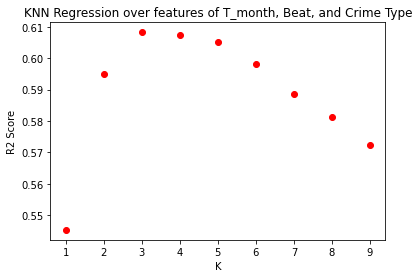

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, f1_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
for x in range(1, 10):
    clf2 = KNeighborsRegressor(n_neighbors=x).fit(X, y)
    print(X.shape)
    print(y.shape)
    y_pred2 = clf2.predict(np.array(df_test_for_average[['T_month','Beat', 'Primary Type']]))
    y_ = r2_score(np.array(df_test_for_average['average']).reshape(-1, 1), y_pred2)
    plt.scatter(x, y_, color='red')
#     plt.plot(x, y_)
    plt.xlabel('K')
    plt.ylabel('R2 Score')
    plt.title('KNN Regression over features of T_month, Beat, and Crime Type')
plt.show()